In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import sys
sys.path.append('..')
import afml.sampling as sampling

In [21]:
raw_data = pd.read_csv('../data/ESU13.csv')
data_indexed = raw_data.copy()
data_indexed['time'] = pd.to_datetime(data_indexed['time'], format='%Y-%m-%d %H:%M:%S.%f')

In [22]:
def plot_thresholds(ties):
    statistics = pd.DataFrame({'value': ties.statistics, 'time': data_indexed.loc[ties.statistics.index, 'time']})
    thresholds = pd.DataFrame({'value': ties.thresholds, 'time': data_indexed.loc[ties.thresholds.index, 'time']})

    plt.figure(figsize=(15, 5))
    plt.plot(statistics['time'], statistics['value'])
    plt.step(thresholds['time'], thresholds['value'], where='pre')
    plt.show()

## Tick imbalance bars

In [24]:
imbalance = sampling.tick_rule(data_indexed['price'])
ties = sampling.TickImbalanceEvents(imbalance, 100000, imbalance.mean().item(), 2*1e-5)

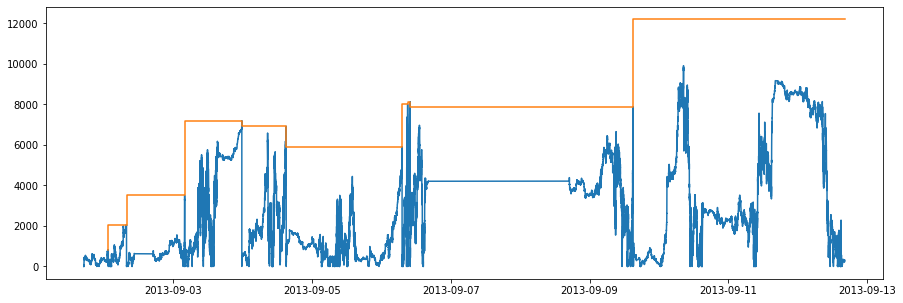

In [25]:
plot_thresholds(ties)

In [26]:
data_tick_vwap = sampling.bars_sampling(data_indexed, ties.events)

In [27]:
data_tick_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-02 01:29:18.999,1640.25,1644.00,1639.00,1644.00,57592,1641.642563,30558.916,16620
1,2013-09-02 07:47:40.478,1644.00,1648.50,1642.25,1648.00,91266,1645.944489,22701.479,28566
2,2013-09-03 03:54:39.285,1648.00,1649.00,1643.00,1643.00,136002,1647.026538,72418.807,43467
3,2013-09-03 23:41:26.827,1643.00,1650.00,1630.75,1641.00,2033814,1640.122817,71207.542,516739
4,2013-09-04 15:02:41.881,1641.00,1654.75,1635.00,1652.75,1531932,1647.633082,55275.054,374495
5,2013-09-06 07:07:56.824,1652.75,1658.25,1648.50,1657.75,1431008,1654.382355,144314.943,380406
6,2013-09-06 09:03:36.065,1657.75,1663.50,1641.25,1641.25,771671,1652.564688,6939.241,200049
7,2013-09-06 09:56:57.531,1641.25,1656.50,1638.75,1656.50,487940,1647.983110,3201.466,130550
8,2013-09-09 15:03:26.646,1656.50,1671.75,1652.00,1671.25,2475668,1661.824069,277589.115,591797
9,2013-09-12 16:14:58.709,1671.25,1690.50,1668.25,1685.50,4428770,1682.455880,263492.063,1071504


## Volume imbalance bars

In [28]:
volume = data_indexed['volume']
volume_imbalance = imbalance*data_indexed['volume']
ties = sampling.DollarVolumeImbalanceEvents(imbalance, volume, 100000, volume_imbalance.mean().item(), 2*1e-5)

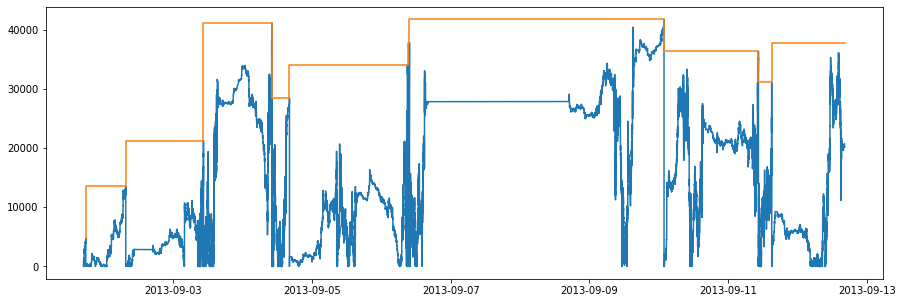

In [29]:
plot_thresholds(ties)

In [30]:
data_volume_vwap = sampling.bars_sampling(data_indexed, ties.events)

In [31]:
data_volume_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-01 17:45:01.458,1640.25,1642.00,1639.00,1641.75,18483,1640.554780,2701.375,4188
1,2013-09-02 07:34:27.579,1641.75,1648.50,1639.75,1648.25,129106,1644.779400,49766.121,40713
2,2013-09-03 10:27:35.366,1648.25,1650.00,1639.00,1639.00,966775,1646.009004,96787.787,267590
3,2013-09-04 10:10:15.741,1639.00,1649.75,1630.75,1649.75,1883367,1638.438324,85360.375,475106
4,2013-09-04 16:12:54.375,1649.75,1654.75,1648.00,1654.75,898643,1651.854416,21758.634,199562
5,2013-09-06 09:04:06.762,1654.75,1663.50,1640.00,1640.00,2173222,1653.655301,147071.616,577559
6,2013-09-06 09:43:46.809,1640.00,1652.75,1638.75,1652.75,361408,1646.404678,2380.047,101006
7,2013-09-10 01:48:00.862,1652.75,1673.00,1652.00,1672.25,2694754,1661.858884,317054.039,639987
8,2013-09-11 10:27:45.612,1672.25,1684.00,1671.50,1682.00,2433342,1680.407729,117584.750,603277
9,2013-09-11 15:03:15.301,1682.00,1688.50,1681.50,1688.50,814252,1685.495841,16529.689,160004


## Dollar-volume imbalance bars

In [32]:
dollar_volume = data_indexed['volume']*data_indexed['price']
dollar_volume_imbalance = imbalance*dollar_volume
ties = sampling.DollarVolumeImbalanceEvents(imbalance, dollar_volume, 100000, dollar_volume_imbalance.mean().item(), 2*1e-5)

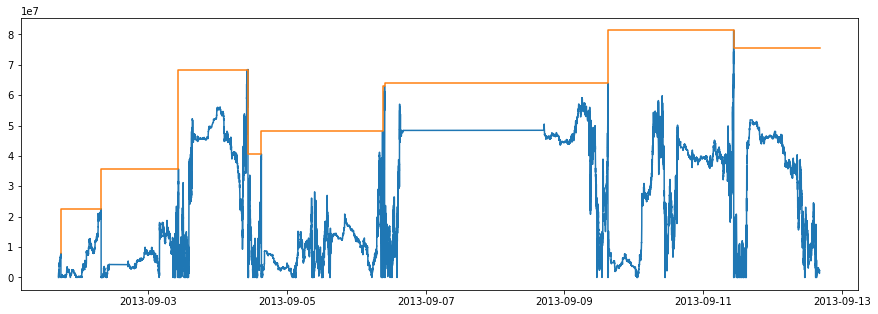

In [33]:
plot_thresholds(ties)

In [34]:
data_dollar_volume_vwap = sampling.bars_sampling(data_indexed, ties.events)
data_dollar_volume_vwap

,time,open,high,low,close,volume,vwap,duration,ticks
0,2013-09-01 17:46:56.474,1640.25,1642.00,1639.00,1641.75,18670,1640.567957,2816.391,4237
1,2013-09-02 07:42:21.716,1642.00,1648.50,1639.75,1647.75,129628,1644.800012,50104.934,40851
2,2013-09-03 10:27:35.371,1647.75,1650.00,1639.00,1639.00,966315,1646.005898,96313.655,267423
3,2013-09-04 10:30:01.021,1639.00,1649.75,1630.75,1649.00,1935612,1638.719283,86545.650,486344
4,2013-09-04 15:08:58.895,1649.00,1654.75,1648.75,1653.75,816994,1651.988537,16737.874,184011
5,2013-09-06 09:03:39.171,1653.75,1663.50,1640.75,1640.75,2189108,1653.733491,150879.169,578213
6,2013-09-06 09:46:10.758,1640.75,1654.50,1638.75,1654.25,410260,1646.825913,2551.587,112450
7,2013-09-09 15:01:14.191,1654.25,1671.75,1652.00,1671.25,2538024,1661.567819,278103.433,607309
8,2013-09-11 10:32:35.681,1671.25,1684.00,1668.25,1684.00,2591314,1679.971283,156681.490,635711
9,2013-09-12 16:14:58.709,1684.00,1690.50,1681.25,1685.50,1849738,1685.860788,106943.028,437644


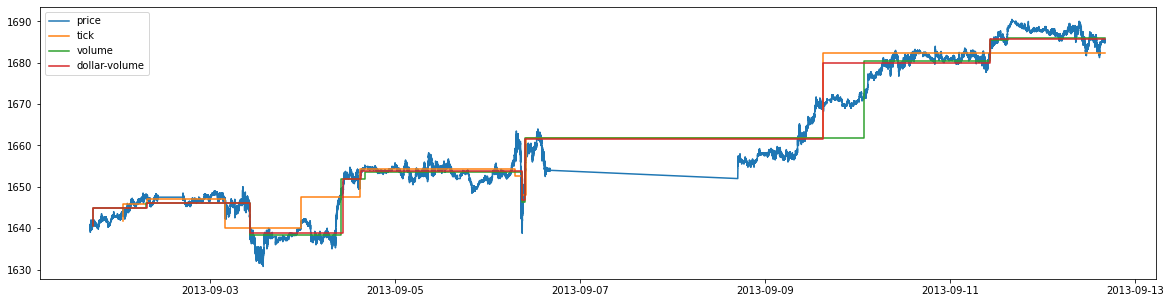

In [35]:
plt.figure(figsize=(20, 5))
plt.plot(data_indexed.time, data_indexed.price, label='price')
plt.step(data_tick_vwap['time'], data_tick_vwap['vwap'], where='pre', label='tick')
plt.step(data_volume_vwap['time'], data_volume_vwap['vwap'], where='pre', label='volume')
plt.step(data_dollar_volume_vwap['time'], data_dollar_volume_vwap['vwap'], where='pre', label='dollar-volume')
plt.legend()
plt.show()